In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [4]:
dataframe_train = pd.read_csv("dataset/Train.csv")
dataframe_test = pd.read_csv("dataset/Test.csv")
ID = dataframe_test["Item_Identifier"]

In [5]:
print("Training dataset shape: ", dataframe_train.shape)
dataframe_train.head()

Training dataset shape:  (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
print("Test Dataset shape: ", dataframe_test.shape)
dataframe_test.tail()

Test Dataset shape:  (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


### Removing Unwanted Columns/Features

In [7]:
try:
    dataframe_train.drop(labels=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)
    dataframe_test.drop(labels=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)
    
except Exception as e:
    pass

In [8]:
dataframe_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [9]:
dataframe_train.shape

(8523, 9)

In [10]:
dataframe_test.shape

(5681, 8)

### Getting Information about Null Values

In [11]:
train_df = dataframe_train.isnull().sum().reset_index()
train_df['Percentage'] = (train_df[0]/dataframe_train.shape[0])* 100
train_df.columns = ["Column Name", "Number of Null Values", 'Null values in Percentage']

In [12]:
test_df = dataframe_test.isnull().sum().reset_index()
test_df['Percentage'] = (test_df[0]/dataframe_test.shape[0])* 100
test_df.columns = ["Column Name", "Number of Null Values", 'Null values in Percentage']

In [13]:
print("Dataframe showing the null values in corresponding columns in Train Set")
train_df

Dataframe showing the null values in corresponding columns in Train Set


,Column Name,Number of Null Values,Null values in Percentage
0,Item_Weight,1463,17.165317
1,Item_Fat_Content,0,0.000000
2,Item_Visibility,0,0.000000
3,Item_Type,0,0.000000
4,Item_MRP,0,0.000000
5,Outlet_Size,2410,28.276428
6,Outlet_Location_Type,0,0.000000
7,Outlet_Type,0,0.000000
8,Item_Outlet_Sales,0,0.000000


In [14]:
print("Dataframe showing the null values in corresponding columns in Test Set")
test_df

Dataframe showing the null values in corresponding columns in Test Set


,Column Name,Number of Null Values,Null values in Percentage
0,Item_Weight,976,17.180074
1,Item_Fat_Content,0,0.000000
2,Item_Visibility,0,0.000000
3,Item_Type,0,0.000000
4,Item_MRP,0,0.000000
5,Outlet_Size,1606,28.269671
6,Outlet_Location_Type,0,0.000000
7,Outlet_Type,0,0.000000


## Fixing Missing Values in Outlet_Size in both Train and Test Set

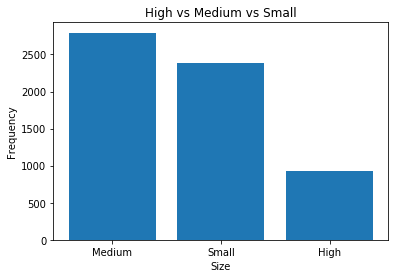

The corresponding value in dataframe: 


,index,Outlet_Size
0,Medium,2793
1,Small,2388
2,High,932


In [15]:
count = dataframe_train['Outlet_Size'].value_counts().reset_index()

# Converting dataframe into numpy array
count_array = count.values.T    

# Bar graph showing the frequency different outlet sizes in Trainset
plt.bar(count_array[0], count_array[1])
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.title("High vs Medium vs Small")
plt.show()
print("The corresponding value in dataframe: ")
count

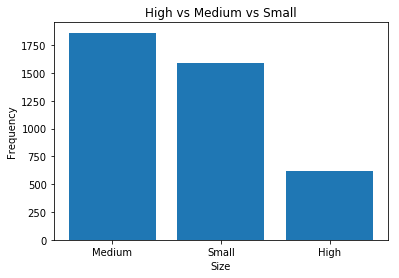

The corresponding value in dataframe: 


,index,Outlet_Size
0,Medium,1862
1,Small,1592
2,High,621


In [16]:
## fixing Missing Values in Outlet_Size in both Train and Test Set
count = dataframe_test['Outlet_Size'].value_counts().reset_index()

# Converting dataframe into numpy array
count_array = count.values.T    

# Bar graph showing the frequency different outlet sizes in Trainset
plt.bar(count_array[0], count_array[1])
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.title("High vs Medium vs Small")
plt.show()
print("The corresponding value in dataframe: ")
count

In [17]:
dataframe_train['Outlet_Size'].fillna(value='Medium', inplace= True)
dataframe_test['Outlet_Size'].fillna(value='Medium', inplace= True)

In [18]:
dataframe_train["Item_Weight"].fillna(dataframe_train["Item_Weight"].mean(),inplace = True)
dataframe_test["Item_Weight"].fillna(dataframe_test["Item_Weight"].mean(),inplace = True)

print("Number of null values in Item_Weight Column (Train Set): ", dataframe_train["Item_Weight"].isnull().sum())
print("Number of null values in Item_Weight Column (Test Set): ",dataframe_test["Item_Weight"].isnull().sum())

Number of null values in Item_Weight Column (Train Set):  0
Number of null values in Item_Weight Column (Test Set):  0


Text(0.5, 1.0, 'Histogram representing Item Weight in Training Set')

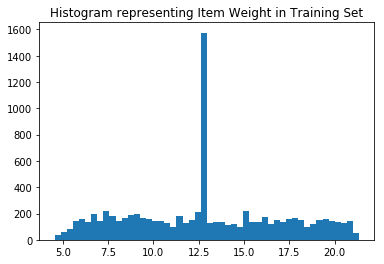

In [19]:
plt.hist(dataframe_train["Item_Weight"], bins=50)
plt.title("Histogram representing Item Weight in Training Set")

In [20]:
dataframe_train.isnull().sum().reset_index()

,index,0
0,Item_Weight,0
1,Item_Fat_Content,0
2,Item_Visibility,0
3,Item_Type,0
4,Item_MRP,0
5,Outlet_Size,0
6,Outlet_Location_Type,0
7,Outlet_Type,0
8,Item_Outlet_Sales,0


In [21]:
dataframe_train.isnull().sum().reset_index()

,index,0
0,Item_Weight,0
1,Item_Fat_Content,0
2,Item_Visibility,0
3,Item_Type,0
4,Item_MRP,0
5,Outlet_Size,0
6,Outlet_Location_Type,0
7,Outlet_Type,0
8,Item_Outlet_Sales,0


### Correction in "Item_Fat_Content" column

There may be various letter combination to represent "Low Fat" like "LF" "lowfat" etc    

<BarContainer object of 8523 artists>

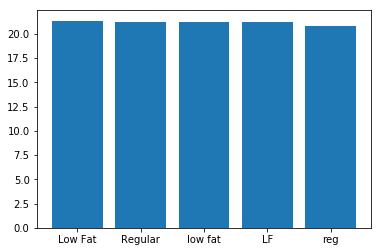

In [22]:
plt.bar(dataframe_train["Item_Fat_Content"], dataframe_train["Item_Weight"])

In [23]:
print("Unique Values in Train set Column are: ", dataframe_train['Item_Fat_Content'].unique())
print("Unique Values in Test Set Column are: ", dataframe_test['Item_Fat_Content'].unique())

Unique Values in Train set Column are:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique Values in Test Set Column are:  ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [24]:
def convert(x):
    if x in ['low fat', 'LF']:
        return 'Low Fat'
    elif x=='reg':
        return 'Regular'
    else:
        return x
    
dataframe_train['Item_Fat_Content'] = dataframe_train['Item_Fat_Content'].apply(convert)
dataframe_test['Item_Fat_Content'] = dataframe_test['Item_Fat_Content'].apply(convert)

# After Conversion
print("Now unique values in Train set with column name 'Item_Fat_Content' are: ", dataframe_train['Item_Fat_Content'].unique())
print("Now unique values in Test set with column name 'Item_Fat_Content' are: ", dataframe_test['Item_Fat_Content'].unique())

Now unique values in Train set with column name 'Item_Fat_Content' are:  ['Low Fat' 'Regular']
Now unique values in Test set with column name 'Item_Fat_Content' are:  ['Low Fat' 'Regular']


<BarContainer object of 8523 artists>

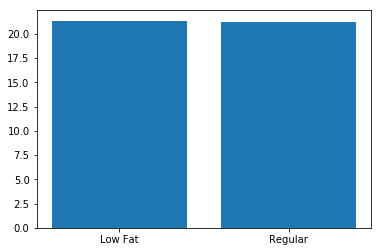

In [25]:
plt.bar(dataframe_train["Item_Fat_Content"], dataframe_train["Item_Weight"])

## Prediction with Regression Models

In [26]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [27]:
x_train = dataframe_train.iloc[:, :-1].values
y_train = dataframe_train.iloc[:, -1].values
x_test = dataframe_test.values

## Encoding the Categorical Values

In [28]:
# For Train Set
labelencoder_x = LabelEncoder()
x_train[:, 1 ] = labelencoder_x.fit_transform(x_train[:,1 ])
x_train[:, 3 ] = labelencoder_x.fit_transform(x_train[:,3 ])
x_train[:, 5 ] = labelencoder_x.fit_transform(x_train[:,5 ])
x_train[:, 6 ] = labelencoder_x.fit_transform(x_train[:,6 ])
x_train[:, 7 ] = labelencoder_x.fit_transform(x_train[:,7 ])

# for categories more than two OneHotEncoding needs to be done.
onehotencoder_x = OneHotEncoder(categorical_features=[3,5,6,7]) 
x_train = onehotencoder_x.fit_transform(x_train).toarray()

/home/ashish/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [29]:
# Let's apply same concept on test set.
x_test[:, 1 ] = labelencoder_x.fit_transform(x_test[:,1 ])
x_test[:, 3 ] = labelencoder_x.fit_transform(x_test[:,3 ])
x_test[:, 5 ] = labelencoder_x.fit_transform(x_test[:,5 ])
x_test[:, 6 ] = labelencoder_x.fit_transform(x_test[:,6 ])
x_test[:, 7 ] = labelencoder_x.fit_transform(x_test[:,7 ])


onehotencoder_x = OneHotEncoder(categorical_features=[3,5,6,7]) 
x_test = onehotencoder_x.fit_transform(x_test).toarray()

/home/ashish/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Feature Scaling

In [30]:
#scaling=StandardScaler()
#x_train=scaling.fit_transform(x_train)
#x_test = scaling.fit_transform(x_test)

In [31]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=None)
#x_train = pca.fit_transform(x_train)
#x_test = pca.fit_transform(x_test)
#explained_variance = pca.explained_variance_ratio_
#explained_variance

In [32]:
#pca = PCA(n_components=27)
#x_train = pca.fit_transform(x_train)
#x_test = pca.fit_transform(x_test)

In [33]:
# Multi-linear regression Model.
regressor_multi = LinearRegression()
regressor_multi.fit(x_train,y_train)

# Let us check the accuray
accuracy = cross_val_score(estimator=regressor_multi, X=x_train, y=y_train,cv=10)
print("The accuracy of the Multi-linear Regressor Model is: {:.4f}%".format(accuracy.mean()*100))
print("The deviation in the accuracy is: {:.6f}".format(accuracy.std()))

The accuracy of the Multi-linear Regressor Model is: 55.7582%
The deviation in the accuracy is: 0.021215


In [34]:
y_pred = regressor_multi.predict(x_test)

In [35]:
prediction_r = pd.DataFrame({'Id': ID, 'SalesPrice': y_pred})

In [36]:
prediction_r.to_csv('predicted_output/multiclass-regression-Prediction.csv', index=False)

In [54]:
prediction_r.head()

,Id,SalesPrice
0,FDW58,1773.941704
1,FDW14,1476.285412
2,NCN55,1876.850430
3,FDQ58,2526.472569
4,FDY38,5137.343377


# XGBRegressor

In [55]:
from xgboost import XGBRegressor
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
my_model = XGBRegressor(n_estimators=90, learning_rate=0.05)
my_model.fit(X_train,Y_train)
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(Y_test,predictions)))

[03:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error : 769.11806727882


In [56]:
predictions = my_model.predict(x_test)

In [57]:
prediction_x = pd.DataFrame({'Id': ID, 'SalePrice': predictions})

In [58]:
prediction_x.to_csv('predicted_output/XGBRegressor-Prediction.csv', index=False)

In [59]:
prediction_x.head()

,Id,SalePrice
0,FDW58,1602.989868
1,FDW14,1350.226562
2,NCN55,569.750305
3,FDQ58,2416.932617
4,FDY38,5883.718262
